In [ ]:
# Author: Enock Niyonkuru
# Class: Deep Learning
# Topic: TensorFlow and Keras for Neural Networks
# Date:  20 March 2022

# **Deep_Learning Project Fifa_Dataset**

In this project, we will work with TensorFlow and Keras to develop, train and evaluate Neural Network models for a Regression and multi-class classification problem.

For this assignment, you need to complete the following tasks:

*   Load data from CSV and make it available to Keras.
*   Prepare multi-class classification data for modeling with neural networks
*   Prepare regression data for modeling with neural networks 
*   Evaluate Keras neural network models with scikit-learn.


<center> 
 
 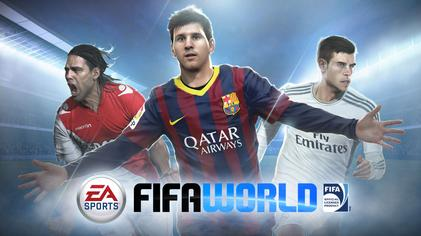
<br/>

</center>

<br/>




# **Dataset**


The data was scrapped from the sofifa website using a python crawling script. The website contains the data from the EA Sports' game FIFA and gets updated regularly with the release of new versions of the game. data developed by Electronic Arts for the latest edition of their FIFA game franchise. Through several research projects done on soccer analytics, it has been established in the field of academia that the use of data from the FIFA franchise has several merits that traditional datasets based on historical data do not offer. Since 1995 the FIFA Soccer games provide an extensive and coherent scout of players worldwide.

For each attribute, we have an integer from 0 to 100 that measures how good a player is at that attribute. Examples of attributes are: dribbling, aggression, vision, marking and ball control. Observe that it seems to be unfeasible to accurately characterize players in these attributes automatically. Thus, all of those are gathered and curated by the company whose job is to bring the gameplay closer to reality as possible, hence preserving coherence and representativeness across the dataset.

The FIFA 18 dataset that has been used for this analysis provides statistics of about 18000 players on over 89 different attributes. These attributes are optimal indicators to determine the performance of a player at a particular playing position.


The data includes FIFA 2019 players with following attributes: 
<br/><br/>
`Age, Nationality, Overall, Potential, Club, Value, Wage, Preferred Foot, International Reputation, Weak Foot, Skill Moves, Work Rate, Position, Jersey Number, Joined, Loaned From, Contract Valid Until, Height, Weight, LS, ST, RS, LW, LF, CF, RF, RW, LAM, CAM, RAM, LM, LCM, CM, RCM, RM, LWB, LDM, CDM, RDM, RWB, LB, LCB, CB, RCB, RB, Crossing, Finishing, Heading, Accuracy, ShortPassing, Volleys, Dribbling, Curve, FKAccuracy, LongPassing, BallControl, Acceleration, SprintSpeed, Agility, Reactions, Balance, ShotPower, Jumping, Stamina, Strength, LongShots, Aggression, Interceptions, Positioning, Vision, Penalties, Composure, Marking, StandingTackle, SlidingTackle, GKDiving, GKHandling, GKKicking, GKPositioning, GKReflexes, and Release Clause.`



# **Data Pre-Processing**

We first need to preprocess the data for the neural networks. You may take help from the lecture slides, class notebooks and official Python documentation to complete the following exerices. <br/>

- Download the dataset (Code Provided).
- Categorize Position to 4 classes (Goalkeeper,Defender, Midfielder, Forward)
- Convert Player Wage (Wage) to numeric. Datatype should be float
- Convert Player Value (Value) to numeric. Datatype should be float
- Normalize Data


Please use the keys below to categorize Player Position (Position column):


```
forward_player = ["ST", "LW", "RW", "LF", "RF", "RS","LS", "CF"]
midfielder_player = ["CM","RCM","LCM", "CDM","RDM","LDM", "CAM", "LAM", "RAM", "RM", "LM"]
defender_player = ["CB", "RCB", "LCB", "LWB", "RWB", "LB", "RB"]
```



# **Define a Regression model to predict player value (Value)**


- Split the data into training and test set(80-20 split).
- Build the regression model.
- Use early stopping to stop training
- Compute RMSE score on the test set
- Plot Lift Chart on Model Predictions vs Test set
- Compare RMSE score on another model with same layers, but add a Dropout layer preceeding the final output layer 


# **Define a multi-class Classification model to predict player position (Position)**

- Split the data into training and test set(80-20 split).
- Build the multi-class classification model
- Use early stopping to stop training
- Compute Accuracy score on the test set
- Print Classification on Test Set (Precision, Recall, F1 score)
- Plot Confusion Matrix
- Compute and Plot Log Loss on Test set

# **Implement Regularization Techniques**

- Create a linear regression model.
- Split the data into training and test set(80-20 split).
- Fit/train linear regression model
- Measure RMSE error
- Print and Plot Feature Correlation Table (similar to shown in lecture)
- Create a Lasso (L1) regression model.
- Split the data into training and test set(80-20 split).
- Fit/train Lasso regression model
- Measure RMSE error
- Print and Plot Feature Correlation Table (similar to shown in lecture)
- Create a Ridge (L2) regression model.
- Split the data into training and test set(80-20 split).
- Fit/train Ridge regression model
- Measure RMSE error
- Print and Plot Feature Correlation Table (similar to shown in lecture)

# **Implement K-Fold Cross Validation**

- Define a multi-class classification model to predict player position
- Donot split data into training and test set
- Use 5-Fold Cross validation to evaluate out-of-Sample classification predictions
- Compute and Print accuracy score for each split


# **Bootstrapping**
We will use Boostrapping to compare performance with different on a Classification Model with different runs: 
- Prepare data for a multi-class prediction model
- Column to Predict: `Position`
- Use SPLITS = 100
- You need to track progress of log loss score, number of epochs, and training time.
- For each split you need to do the following: 
- Loop through samples,
- Split train and test, 
- Construct the neural network,  
- Train on the bootstrap sample, 
- Predict on the out of boot (validation)
- Measure this bootstrap's log loss
- Record and Print this iteration performance 
- Metrics to report: <br/>
 `Log Loss score, number of epochs, mean benchmark score, standard deviation and training time`

## Code to check correct version of TensorFlow in Google Colab

# **1. DATA Pre-Processing** 

In [1]:
try:
    %tensorflow_version 2.x
    COLAB = True
    print("Note: using Google CoLab")
except:
    print("Note: not using Google CoLab")
    COLAB = False

Note: using Google CoLab


In [2]:
# Import Libraries
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd 
import seaborn as sns
# Keras
from keras.models import Sequential
from keras.layers import Dense
# from keras.optimizers import SGD, Adam, Adadelta, RMSprop
import keras.backend as K
# Train-Test
from sklearn.model_selection import train_test_split
# Scaling data
from sklearn.preprocessing import StandardScaler
# Classification Report
from sklearn.metrics import classification_report

In [3]:
# Download data to a dataframe
import os
import pandas as pd
file_path = 'https://people.ucsc.edu/~cchakrab/data/soccer_data.csv'

		
df = pd.read_csv(file_path,engine='python',index_col=False)

df = df[['Age','Value','Overall','Potential','Wage',"Position", 'Finishing', 'HeadingAccuracy', 'ShortPassing', 'Volleys', 'Dribbling',
       'Curve', 'FKAccuracy', 'LongPassing', 'BallControl', 'Acceleration',
       'SprintSpeed', 'Agility', 'Reactions', 'Balance', 'ShotPower',
       'Jumping', 'Stamina', 'Strength', 'LongShots', 'Aggression',
       'Interceptions', 'Positioning', 'Vision', 'Penalties', 'Composure',
       'Marking', 'StandingTackle', 'SlidingTackle', 'GKDiving', 'GKHandling',
       'GKKicking', 'GKPositioning', 'GKReflexes']]

# Remove Missing Values 
na = pd.notnull(df["Position"])
df = df[na]
df.head(5)

,Age,Value,Overall,Potential,Wage,Position,Finishing,HeadingAccuracy,ShortPassing,Volleys,...,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes
0,31,€110.5M,94,94,€565K,RF,95.0,70.0,90.0,86.0,...,75.0,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0
1,33,€77M,94,94,€405K,ST,94.0,89.0,81.0,87.0,...,85.0,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0
2,26,€118.5M,92,93,€290K,LW,87.0,62.0,84.0,84.0,...,81.0,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0
3,27,€72M,91,93,€260K,GK,13.0,21.0,50.0,13.0,...,40.0,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0
4,27,€102M,91,92,€355K,RCM,82.0,55.0,92.0,82.0,...,79.0,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0


In [4]:
# Convert Player Position to Categorical
position_list = []
position_fist_list = df['Position'].to_list()

#Categorize Position to 4 classes (Goalkeeper,Defender, Midfielder, Forward)
forward_player = ["ST", "LW", "RW", "LF", "RF", "RS","LS", "CF"]
midfielder_player = ["CM","RCM","LCM", "CDM","RDM","LDM", "CAM", "LAM", "RAM", "RM", "LM"]
defender_player = ["CB", "RCB", "LCB", "LWB", "RWB", "LB", "RB"]
goalkeeper_player = ["GK"]

def categorise(list, word):
  for i in list:
    if (i == word):
        return True

for i in position_fist_list:
  if(categorise(forward_player, i) == True):
    position_list.append(3)
  elif(categorise(midfielder_player,i)== True):
    position_list.append(2)
  elif(categorise(defender_player, i) == True):
    position_list.append(1)
  elif(categorise(goalkeeper_player, i)== True):
    position_list.append(0)
df['Position'] = position_list

df.head(5)

,Age,Value,Overall,Potential,Wage,Position,Finishing,HeadingAccuracy,ShortPassing,Volleys,...,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes
0,31,€110.5M,94,94,€565K,3,95.0,70.0,90.0,86.0,...,75.0,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0
1,33,€77M,94,94,€405K,3,94.0,89.0,81.0,87.0,...,85.0,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0
2,26,€118.5M,92,93,€290K,3,87.0,62.0,84.0,84.0,...,81.0,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0
3,27,€72M,91,93,€260K,0,13.0,21.0,50.0,13.0,...,40.0,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0
4,27,€102M,91,92,€355K,2,82.0,55.0,92.0,82.0,...,79.0,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0


In [5]:
# Convert wage to numeric
import re
wage_list = []
wage_fist_list = df['Wage'].to_list()

for i in wage_fist_list:
  wage_list.append(float(re.sub('\D', '', i)))

df['Wage'] = wage_list

df.head(5)

,Age,Value,Overall,Potential,Wage,Position,Finishing,HeadingAccuracy,ShortPassing,Volleys,...,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes
0,31,€110.5M,94,94,565.0,3,95.0,70.0,90.0,86.0,...,75.0,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0
1,33,€77M,94,94,405.0,3,94.0,89.0,81.0,87.0,...,85.0,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0
2,26,€118.5M,92,93,290.0,3,87.0,62.0,84.0,84.0,...,81.0,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0
3,27,€72M,91,93,260.0,0,13.0,21.0,50.0,13.0,...,40.0,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0
4,27,€102M,91,92,355.0,2,82.0,55.0,92.0,82.0,...,79.0,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0


In [6]:
# Convert Value to numeric
value_list = []
value_fist_list = df['Value'].to_list()

for i in value_fist_list:
  value_list.append(float(re.sub('\D', '', i)))

df['Value'] = value_list

df.head(5)

,Age,Value,Overall,Potential,Wage,Position,Finishing,HeadingAccuracy,ShortPassing,Volleys,...,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes
0,31,1105.0,94,94,565.0,3,95.0,70.0,90.0,86.0,...,75.0,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0
1,33,77.0,94,94,405.0,3,94.0,89.0,81.0,87.0,...,85.0,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0
2,26,1185.0,92,93,290.0,3,87.0,62.0,84.0,84.0,...,81.0,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0
3,27,72.0,91,93,260.0,0,13.0,21.0,50.0,13.0,...,40.0,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0
4,27,102.0,91,92,355.0,2,82.0,55.0,92.0,82.0,...,79.0,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0


In [7]:
# Player Position Key
forward_player = ["ST", "LW", "RW", "LF", "RF", "RS","LS", "CF"]
midfielder_player = ["CM","RCM","LCM", "CDM","RDM","LDM", "CAM", "LAM", "RAM", "RM", "LM"]
defender_player = ["CB", "RCB", "LCB", "LWB", "RWB", "LB", "RB"]

In [8]:
df.columns

Index(['Age', 'Value', 'Overall', 'Potential', 'Wage', 'Position', 'Finishing',
       'HeadingAccuracy', 'ShortPassing', 'Volleys', 'Dribbling', 'Curve',
       'FKAccuracy', 'LongPassing', 'BallControl', 'Acceleration',
       'SprintSpeed', 'Agility', 'Reactions', 'Balance', 'ShotPower',
       'Jumping', 'Stamina', 'Strength', 'LongShots', 'Aggression',
       'Interceptions', 'Positioning', 'Vision', 'Penalties', 'Composure',
       'Marking', 'StandingTackle', 'SlidingTackle', 'GKDiving', 'GKHandling',
       'GKKicking', 'GKPositioning', 'GKReflexes'],
      dtype='object')

# **2. Define a Regression model to predict player value (Value)**

In [9]:
# Define a Regression Model
import io
import requests
import numpy as np
from sklearn import metrics
from sklearn import preprocessing
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.callbacks import EarlyStopping

from sklearn import metrics
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt

col_list = df.columns
x = df.values
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
df = pd.DataFrame(x_scaled)
df.columns = col_list

# Convert to numpy - Classification
x = df[['Age', 'Value', 'Overall', 'Potential', 'Wage', 'Position', 'Finishing',
       'HeadingAccuracy', 'ShortPassing', 'Volleys', 'Dribbling', 'Curve',
       'FKAccuracy', 'LongPassing', 'BallControl', 'Acceleration',
       'SprintSpeed', 'Agility', 'Reactions', 'Balance', 'ShotPower',
       'Jumping', 'Stamina', 'Strength', 'LongShots', 'Aggression',
       'Interceptions', 'Positioning', 'Vision', 'Penalties', 'Composure',
       'Marking', 'StandingTackle', 'SlidingTackle', 'GKDiving', 'GKHandling',
       'GKKicking', 'GKPositioning', 'GKReflexes']].values
y = df['Value'].values

# Split into validation and training sets
x_train, x_test, y_train, y_test = train_test_split(    
    x, y, test_size=0.25, random_state=42)

monitor = EarlyStopping(monitor='val_loss', min_delta=1e-3, 
        patience=5, verbose=1, mode='auto',
        restore_best_weights=True)


# Build the neural network
model = Sequential()
model.add(Dense(50, input_dim=x.shape[1], activation='relu')) # Hidden 1
model.add(Dense(25, activation='relu')) # Hidden 2
model.add(Dense(1)) # Output
model.compile(loss='mean_squared_error', optimizer='adam')

monitor = EarlyStopping(monitor='val_loss', min_delta=1e-3, 
        patience=5, verbose=1, mode='auto',
        restore_best_weights=True)
model.fit(x_train,y_train,validation_data=(x_test,y_test),
        callbacks=[monitor], verbose=2,epochs=1000)

Epoch 1/1000
426/426 - 3s - loss: 0.0145 - val_loss: 9.0541e-04 - 3s/epoch - 6ms/step
Epoch 2/1000
426/426 - 1s - loss: 5.9229e-04 - val_loss: 3.2943e-04 - 1s/epoch - 3ms/step
Epoch 3/1000
426/426 - 1s - loss: 2.0664e-04 - val_loss: 1.2604e-04 - 1s/epoch - 3ms/step
Epoch 4/1000
426/426 - 1s - loss: 9.1727e-05 - val_loss: 7.5090e-05 - 1s/epoch - 3ms/step
Epoch 5/1000
426/426 - 1s - loss: 4.6573e-05 - val_loss: 2.6257e-05 - 1s/epoch - 3ms/step
Epoch 6/1000
Restoring model weights from the end of the best epoch: 1.
426/426 - 1s - loss: 2.5586e-05 - val_loss: 1.4610e-05 - 1s/epoch - 3ms/step
Epoch 6: early stopping


In [10]:
# Measure RMSE error.  RMSE is common for regression
pred = model.predict(x_test)
score = np.sqrt(metrics.mean_squared_error(pred,y_test))
print(f"Final score (RMSE): {score}")

Final score (RMSE): 0.030089982877480714


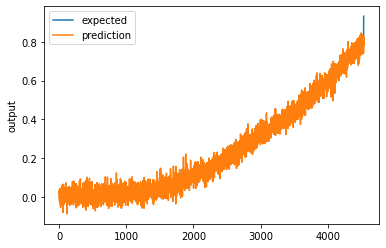

In [11]:
# Define and Plot the Lift chart
# Regression chart.
def chart_regression(pred, y, sort=True):
    t = pd.DataFrame({'pred': pred, 'y': y.flatten()})
    if sort:
        t.sort_values(by=['y'], inplace=True)
    plt.plot(t['y'].tolist(), label='expected')
    plt.plot(t['pred'].tolist(), label='prediction')
    plt.ylabel('output')
    plt.legend()
    plt.show()

# Plot the chart
chart_regression(pred.flatten(),y_test)

# **3. Define a multi-class Classification model to predict player position (Position)**

In [12]:
# Download data to a dataframe

import os
import pandas as pd
file_path = 'https://people.ucsc.edu/~cchakrab/data/soccer_data.csv'

		
df = pd.read_csv(file_path,engine='python',index_col=False)

df = df[["Position", 'Finishing', 'HeadingAccuracy', 'ShortPassing', 'Volleys', 'Dribbling',
       'Curve', 'FKAccuracy', 'LongPassing', 'BallControl', 'Acceleration',
       'SprintSpeed', 'Agility', 'Reactions', 'Balance', 'ShotPower',
       'Jumping', 'Stamina', 'Strength', 'LongShots', 'Aggression',
       'Interceptions', 'Positioning', 'Vision', 'Penalties', 'Composure',
       'Marking', 'StandingTackle', 'SlidingTackle', 'GKDiving', 'GKHandling',
       'GKKicking', 'GKPositioning', 'GKReflexes']]

# Remove Missing Values 
na = pd.notnull(df["Position"])
df = df[na]
df.head(5)


,Position,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,...,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes
0,RF,95.0,70.0,90.0,86.0,97.0,93.0,94.0,87.0,96.0,...,75.0,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0
1,ST,94.0,89.0,81.0,87.0,88.0,81.0,76.0,77.0,94.0,...,85.0,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0
2,LW,87.0,62.0,84.0,84.0,96.0,88.0,87.0,78.0,95.0,...,81.0,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0
3,GK,13.0,21.0,50.0,13.0,18.0,21.0,19.0,51.0,42.0,...,40.0,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0
4,RCM,82.0,55.0,92.0,82.0,86.0,85.0,83.0,91.0,91.0,...,79.0,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0


In [13]:
# Convert Player Position to Categorical
position_list = []
position_fist_list = df['Position'].to_list()

#Categorize Position to 4 classes (Goalkeeper,Defender, Midfielder, Forward)
forward_player = ["ST", "LW", "RW", "LF", "RF", "RS","LS", "CF"]
midfielder_player = ["CM","RCM","LCM", "CDM","RDM","LDM", "CAM", "LAM", "RAM", "RM", "LM"]
defender_player = ["CB", "RCB", "LCB", "LWB", "RWB", "LB", "RB"]
goalkeeper_player = ["GK"]

def categorise(list, word):
  for i in list:
    if (i == word):
        return True

for i in position_fist_list:
  if(categorise(forward_player, i) == True):
    position_list.append(3)
  elif(categorise(midfielder_player,i)== True):
    position_list.append(2)
  elif(categorise(defender_player, i) == True):
    position_list.append(1)
  elif(categorise(goalkeeper_player, i)== True):
    position_list.append(0)
df['Position'] = position_list

df.head(5)

,Position,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,...,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes
0,3,95.0,70.0,90.0,86.0,97.0,93.0,94.0,87.0,96.0,...,75.0,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0
1,3,94.0,89.0,81.0,87.0,88.0,81.0,76.0,77.0,94.0,...,85.0,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0
2,3,87.0,62.0,84.0,84.0,96.0,88.0,87.0,78.0,95.0,...,81.0,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0
3,0,13.0,21.0,50.0,13.0,18.0,21.0,19.0,51.0,42.0,...,40.0,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0
4,2,82.0,55.0,92.0,82.0,86.0,85.0,83.0,91.0,91.0,...,79.0,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0


In [14]:
# Player Position Key
forward_player = ["ST", "LW", "RW", "LF", "RF", "RS","LS", "CF"]
midfielder_player = ["CM","RCM","LCM", "CDM","RDM","LDM", "CAM", "LAM", "RAM", "RM", "LM"]
defender_player = ["CB", "RCB", "LCB", "LWB", "RWB", "LB", "RB"]

In [15]:
# Define and Train a multi-class Keras Classification Model

In [16]:
# Convert to numpy - Classification
x_columns = df.columns.drop('Position')
x = df[x_columns].values
dummies = pd.get_dummies(df['Position']) # Classification
products = dummies.columns
y = dummies.values

In [17]:
# Classification neural network
import numpy as np
import tensorflow.keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split

# Split into train/test
x_train, x_test, y_train, y_test = train_test_split(    
    x, y, test_size=0.20, random_state=42)

model = Sequential()
model.add(Dense(100, input_dim=x.shape[1], activation='relu',
                kernel_initializer='random_normal'))
model.add(Dense(50,activation='relu',kernel_initializer='random_normal'))
model.add(Dense(25,activation='relu',kernel_initializer='random_normal'))
model.add(Dense(y.shape[1],activation='softmax',
                kernel_initializer='random_normal'))
model.compile(loss='categorical_crossentropy', 
              optimizer=tensorflow.keras.optimizers.Adam(),
              metrics =['accuracy'])
monitor = EarlyStopping(monitor='val_loss', min_delta=1e-3, patience=5, 
                        verbose=1, mode='auto', restore_best_weights=True)
model.fit(x_train,y_train,validation_data=(x_test,y_test),
          callbacks=[monitor],verbose=2,epochs=1000)
model.summary()

Epoch 1/1000
454/454 - 3s - loss: 0.4512 - accuracy: 0.7999 - val_loss: 0.3404 - val_accuracy: 0.8534 - 3s/epoch - 6ms/step
Epoch 2/1000
454/454 - 1s - loss: 0.3581 - accuracy: 0.8475 - val_loss: 0.3636 - val_accuracy: 0.8413 - 1s/epoch - 3ms/step
Epoch 3/1000
454/454 - 1s - loss: 0.3463 - accuracy: 0.8522 - val_loss: 0.3173 - val_accuracy: 0.8628 - 1s/epoch - 3ms/step
Epoch 4/1000
454/454 - 1s - loss: 0.3413 - accuracy: 0.8558 - val_loss: 0.2996 - val_accuracy: 0.8722 - 1s/epoch - 3ms/step
Epoch 5/1000
454/454 - 1s - loss: 0.3354 - accuracy: 0.8583 - val_loss: 0.3043 - val_accuracy: 0.8678 - 1s/epoch - 3ms/step
Epoch 6/1000
454/454 - 1s - loss: 0.3299 - accuracy: 0.8603 - val_loss: 0.2906 - val_accuracy: 0.8782 - 724ms/epoch - 2ms/step
Epoch 7/1000
454/454 - 1s - loss: 0.3244 - accuracy: 0.8642 - val_loss: 0.2930 - val_accuracy: 0.8769 - 706ms/epoch - 2ms/step
Epoch 8/1000
454/454 - 1s - loss: 0.3244 - accuracy: 0.8624 - val_loss: 0.3181 - val_accuracy: 0.8614 - 724ms/epoch - 2ms/step

In [18]:
#classification Accuracy
pred = model.predict(x_test)
pred = np.argmax(pred,axis=1) 

In [19]:
from sklearn import metrics

y_compare = np.argmax(y_test,axis=1) 
#score = metrics.accuracy_score(y_compare, pred)
#print("Accuracy score: {}".format(score))
print(classification_report(y_compare, pred, labels=[0,1,2,3]))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       407
           1       0.90      0.93      0.92      1157
           2       0.85      0.83      0.84      1386
           3       0.82      0.80      0.81       680

    accuracy                           0.88      3630
   macro avg       0.89      0.89      0.89      3630
weighted avg       0.88      0.88      0.88      3630



In [20]:
#confustion Matrix
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
import numpy as np
from sklearn import svm, datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

Confusion matrix, without normalization
[[ 407    0    0    0]
 [   0 1080   77    0]
 [   0  111 1157  118]
 [   0    4  132  544]]
Normalized confusion matrix
[[1.         0.         0.         0.        ]
 [0.         0.93344857 0.06655143 0.        ]
 [0.         0.08008658 0.83477633 0.08513709]
 [0.         0.00588235 0.19411765 0.8       ]]


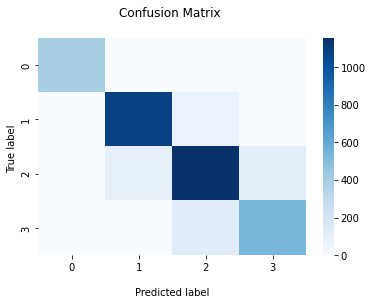

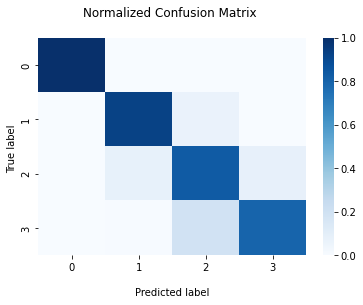

In [21]:
# Compute confusion matrix
from sklearn import metrics
cf_matrix = metrics.confusion_matrix(y_compare, pred, labels=[0,1,2,3])
print('Confusion matrix, without normalization')
print(cf_matrix)

# Normalize the confusion matrix by row (i.e by the number of samples
# in each class)
cm = confusion_matrix(y_compare, pred)
cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
print('Normalized confusion matrix')
print(cm_normalized)
plt.figure()


# Plot confusion matrix
import seaborn as sns

ax = sns.heatmap(cf_matrix, cmap='Blues')

ax.set_title('Confusion Matrix \n');
ax.set_xlabel('\nPredicted label')
ax.set_ylabel('True label ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels([0,1,2,3])
ax.yaxis.set_ticklabels([0,1,2,3])
plt.show()


at = sns.heatmap(cm_normalized, cmap='Blues')
at.set_title('Normalized Confusion Matrix \n');
at.set_xlabel('\nPredicted label')
at.set_ylabel('True label ');
plt.show()

In [22]:
#classification log loss
from IPython.display import display

# Don't display numpy in scientific notation
np.set_printoptions(precision=4)
np.set_printoptions(suppress=True)

# Generate predictions
pred = model.predict(x_test)

print("Numpy array of predictions")
display(pred[0:5])

print("As percent probability")
print(pred[0]*100)

score = metrics.log_loss(y_test, pred)
print("Log loss score: {}".format(score))

# raw probabilities to chosen class (highest probability)
pred = np.argmax(pred,axis=1) 

Numpy array of predictions


array([[0.    , 0.9558, 0.0442, 0.    ],
       [0.    , 0.009 , 0.9897, 0.0013],
       [0.    , 0.0514, 0.8963, 0.0523],
       [0.    , 0.0005, 0.5146, 0.4849],
       [0.    , 0.0003, 0.6947, 0.305 ]], dtype=float32)

As percent probability
[ 0.     95.5785  4.4173  0.0042]
Log loss score: 0.29059125384085827


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: RuntimeWarning: divide by zero encountered in log
  


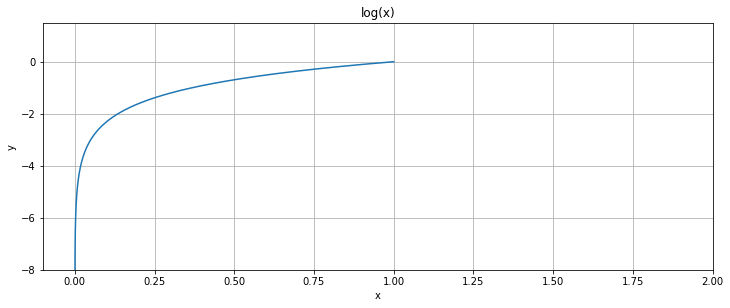

In [23]:

# Plot Log Loss on Training 
%matplotlib inline
from matplotlib.pyplot import figure, show
from numpy import arange, sin, pi

#t = arange(1e-5, 5.0, 0.00001)
#t = arange(1.0, 5.0, 0.00001) # computer scientists
t = arange(0.0, 1.0, 0.00001)  # data     scientists

fig = figure(1,figsize=(12, 10))

ax1 = fig.add_subplot(211)
ax1.plot(t, np.log(t))
ax1.grid(True)
ax1.set_ylim((-8, 1.5))
ax1.set_xlim((-0.1, 2))
ax1.set_xlabel('x')
ax1.set_ylabel('y')
ax1.set_title('log(x)')

show()

# **4. Implement Regularization Techniques**

In [24]:
from sklearn.linear_model import LassoCV
import pandas as pd
import os
import numpy as np
from sklearn import metrics
from scipy.stats import zscore
from sklearn.model_selection import train_test_split 

# Pandas to Numpy
df_2 = df.copy()
df_2.drop('Position', axis=1, inplace=True)
names = df_2.columns
x = df_2.values
y = df['Position'].values # regression

# Split into train/test
x_train, x_test, y_train, y_test = train_test_split(    
    x, y, test_size=0.20, random_state=45)

In [25]:
# Cr function to evaluate the coefficients of a regression
%matplotlib inline    
from IPython.display import display, HTML    

def report_coef(names,coef,intercept):
    r = pd.DataFrame( { 'coef': coef, 'positive': coef>=0  }, 
                     index = names )
    r = r.sort_values(by=['coef'])
    display(r)
    print(f"Intercept: {intercept}")
    r['coef'].plot(kind='barh', color=r['positive'].map(
        {True: 'b', False: 'r'}))

Final score (RMSE): 0.38165466112808666


,coef,positive
SlidingTackle,-0.009135,False
Curve,-0.007297,False
Marking,-0.006818,False
GKDiving,-0.006504,False
GKReflexes,-0.006478,False
GKHandling,-0.006389,False
GKKicking,-0.006340,False
StandingTackle,-0.004812,False
GKPositioning,-0.003977,False
Interceptions,-0.003160,False


Intercept: 1.7317249623210293


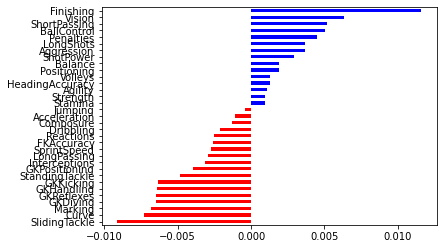

In [26]:
import sklearn

# Create linear regression
regressor = sklearn.linear_model.LinearRegression()

# Fit/train linear regression
regressor.fit(x_train,y_train)
# Predict
pred = regressor.predict(x_test)

# Measure RMSE error.  RMSE is common for regression.
score = np.sqrt(metrics.mean_squared_error(pred,y_test))
print(f"Final score (RMSE): {score}")

report_coef(
  names,
  regressor.coef_,
  regressor.intercept_)

Final score (RMSE): 0.3833028808890451


,coef,positive
SlidingTackle,-0.009828,False
GKReflexes,-0.007137,False
GKDiving,-0.007025,False
GKHandling,-0.006451,False
Marking,-0.006099,False
GKKicking,-0.005892,False
Curve,-0.005655,False
StandingTackle,-0.003904,False
GKPositioning,-0.003825,False
Interceptions,-0.002854,False


Intercept: 1.7962657798729054


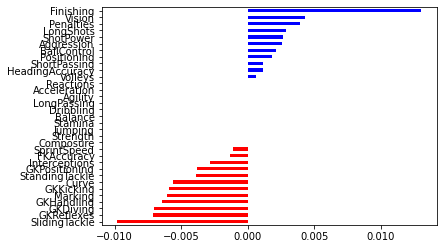

In [27]:
# Create Lasso regression model
import sklearn
from sklearn.linear_model import Lasso

# Create linear regression
regressor = Lasso(random_state=0,alpha=0.1)

# Fit/train LASSO
regressor.fit(x_train,y_train)
# Predict
pred = regressor.predict(x_test)

# Measure RMSE error.  RMSE is common for regression.
score = np.sqrt(metrics.mean_squared_error(pred,y_test))
print(f"Final score (RMSE): {score}")

report_coef(
  names,
  regressor.coef_,
  regressor.intercept_)

Final score (RMSE): 0.38165464983289255


,coef,positive
SlidingTackle,-0.009135,False
Curve,-0.007297,False
Marking,-0.006818,False
GKDiving,-0.006504,False
GKReflexes,-0.006478,False
GKHandling,-0.006389,False
GKKicking,-0.006340,False
StandingTackle,-0.004812,False
GKPositioning,-0.003977,False
Interceptions,-0.003160,False


Intercept: 1.7317248193462462


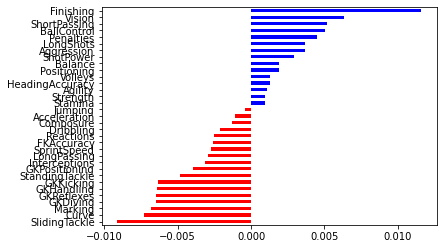

In [28]:
# Create Ridge regression model
import sklearn
from sklearn.linear_model import Ridge

# Create linear regression
regressor = Ridge(alpha=1)

# Fit/train Ridge
regressor.fit(x_train,y_train)
# Predict
pred = regressor.predict(x_test)

# Measure RMSE error.  RMSE is common for regression.
score = np.sqrt(metrics.mean_squared_error(pred,y_test))
print(f"Final score (RMSE): {score}")

report_coef(
  names,
  regressor.coef_,
  regressor.intercept_)

# **5. Implement K-Fold Cross Validation**

In [29]:
# - Define a multi-class classification model to predict player position
# - Donot split data into training and test set
# - Use 5-Fold Cross validation to evaluate out-of-Sample classification predictions
# - Compute and Print accuracy score for each split

In [30]:
# Download data to a dataframe

import os
import pandas as pd
file_path = 'https://people.ucsc.edu/~cchakrab/data/soccer_data.csv'

		
df = pd.read_csv(file_path,engine='python',index_col=False)

df = df[["Position", 'Finishing', 'HeadingAccuracy', 'ShortPassing', 'Volleys', 'Dribbling',
       'Curve', 'FKAccuracy', 'LongPassing', 'BallControl', 'Acceleration',
       'SprintSpeed', 'Agility', 'Reactions', 'Balance', 'ShotPower',
       'Jumping', 'Stamina', 'Strength', 'LongShots', 'Aggression',
       'Interceptions', 'Positioning', 'Vision', 'Penalties', 'Composure',
       'Marking', 'StandingTackle', 'SlidingTackle', 'GKDiving', 'GKHandling',
       'GKKicking', 'GKPositioning', 'GKReflexes']]

# Remove Missing Values 
na = pd.notnull(df["Position"])
df = df[na]

In [31]:
# Convert Player Position to Categorical
position_list = []
position_fist_list = df['Position'].to_list()

#Categorize Position to 4 classes (Goalkeeper,Defender, Midfielder, Forward)
forward_player = ["ST", "LW", "RW", "LF", "RF", "RS","LS", "CF"]
midfielder_player = ["CM","RCM","LCM", "CDM","RDM","LDM", "CAM", "LAM", "RAM", "RM", "LM"]
defender_player = ["CB", "RCB", "LCB", "LWB", "RWB", "LB", "RB"]
goalkeeper_player = ["GK"]

def categorise(list, word):
  for i in list:
    if (i == word):
        return True

for i in position_fist_list:
  if(categorise(forward_player, i) == True):
    position_list.append(3)
  elif(categorise(midfielder_player,i)== True):
    position_list.append(2)
  elif(categorise(defender_player, i) == True):
    position_list.append(1)
  elif(categorise(goalkeeper_player, i)== True):
    position_list.append(0)
df['Position'] = position_list



In [32]:
# Convert to numpy - Classification
x_columns = df.columns.drop('Position')
x = df[x_columns].values
dummies = pd.get_dummies(df['Position']) # Classification
products = dummies.columns
y = dummies.values

In [33]:
EPOCHS=500

In [34]:
import pandas as pd
import os
import numpy as np
from sklearn import metrics
from sklearn.model_selection import StratifiedKFold
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation

# np.argmax(pred,axis=1)
# Cross-validate
# Use for StratifiedKFold classification
kf = StratifiedKFold(5, shuffle=True, random_state=42) 
    
oos_y = []
oos_pred = []
fold = 0

# Must specify y StratifiedKFold for
for train, test in kf.split(x,df['Position']):  
    fold+=1
    print(f"Fold #{fold}")
        
    x_train = x[train]
    y_train = y[train]
    x_test = x[test]
    y_test = y[test]
    
    model = Sequential()
    model.add(Dense(50, input_dim=x.shape[1], activation='relu')) # Hidden 1
    model.add(Dense(25, activation='relu')) # Hidden 2
    model.add(Dense(y.shape[1],activation='softmax')) # Output
    model.compile(loss='categorical_crossentropy', optimizer='adam')

    model.fit(x_train,y_train,validation_data=(x_test,y_test),verbose=0,\
              epochs=EPOCHS)
    
    pred = model.predict(x_test)
    
    oos_y.append(y_test)
    # raw probabilities to chosen class (highest probability)
    pred = np.argmax(pred,axis=1) 
    oos_pred.append(pred)  

    # Measure this fold's accuracy
    y_compare = np.argmax(y_test,axis=1) # For accuracy calculation
    score = metrics.accuracy_score(y_compare, pred)
    print(f"Fold score (accuracy): {score}")

# Build the oos prediction list and calculate the error.
oos_y = np.concatenate(oos_y)
oos_pred = np.concatenate(oos_pred)
oos_y_compare = np.argmax(oos_y,axis=1) # For accuracy calculation

score = metrics.accuracy_score(oos_y_compare, oos_pred)
print(f"Final score (accuracy): {score}")    
    
# Write the cross-validated prediction
oos_y = pd.DataFrame(oos_y)
oos_pred = pd.DataFrame(oos_pred)
oosDF = pd.concat( [df, oos_y, oos_pred],axis=1 )

Fold #1
Fold score (accuracy): 0.865840220385675
Fold #2
Fold score (accuracy): 0.8779614325068871
Fold #3
Fold score (accuracy): 0.8630476715348581
Fold #4
Fold score (accuracy): 0.8671810416092588
Fold #5
Fold score (accuracy): 0.8732433177183797
Final score (accuracy): 0.8694550063371356


# **6. Bootstrapping**

In [35]:
# # **Bootstrapping**
# You need to use Boostrapping to compare performance with different on a Classification Model with different runs: 
# - Prepare data for a multi-class prediction model
# - Column to Predict: `Position`
# - Use SPLITS = 100
# - You need to track progress of log loss score, number of epochs, and training time.
# - For each split you need to do the following: 
# - Loop through samples,
# - Split train and test, 
# - Construct the neural network,  
# - Train on the bootstrap sample, 
# - Predict on the out of boot (validation)
# - Measure this bootstrap's log loss
# - Record and Print this iteration performance 
# - Metrics to report: <br/>
#  `Log Loss score, number of epochs, mean benchmark score, standard deviation and training time`

In [36]:
# Download data to a dataframe

import os
import pandas as pd
file_path = 'https://people.ucsc.edu/~cchakrab/data/soccer_data.csv'

		
df = pd.read_csv(file_path,engine='python',index_col=False)

df = df[["Position", 'Finishing', 'HeadingAccuracy', 'ShortPassing', 'Volleys', 'Dribbling',
       'Curve', 'FKAccuracy', 'LongPassing', 'BallControl', 'Acceleration',
       'SprintSpeed', 'Agility', 'Reactions', 'Balance', 'ShotPower',
       'Jumping', 'Stamina', 'Strength', 'LongShots', 'Aggression',
       'Interceptions', 'Positioning', 'Vision', 'Penalties', 'Composure',
       'Marking', 'StandingTackle', 'SlidingTackle', 'GKDiving', 'GKHandling',
       'GKKicking', 'GKPositioning', 'GKReflexes']]

# Remove Missing Values 
na = pd.notnull(df["Position"])
df = df[na]

In [37]:
# Convert Player Position to Categorical
position_list = []
position_fist_list = df['Position'].to_list()

#Categorize Position to 4 classes (Goalkeeper,Defender, Midfielder, Forward)
forward_player = ["ST", "LW", "RW", "LF", "RF", "RS","LS", "CF"]
midfielder_player = ["CM","RCM","LCM", "CDM","RDM","LDM", "CAM", "LAM", "RAM", "RM", "LM"]
defender_player = ["CB", "RCB", "LCB", "LWB", "RWB", "LB", "RB"]
goalkeeper_player = ["GK"]

def categorise(list, word):
  for i in list:
    if (i == word):
        return True

for i in position_fist_list:
  if(categorise(forward_player, i) == True):
    position_list.append(3)
  elif(categorise(midfielder_player,i)== True):
    position_list.append(2)
  elif(categorise(defender_player, i) == True):
    position_list.append(1)
  elif(categorise(goalkeeper_player, i)== True):
    position_list.append(0)
df['Position'] = position_list



In [38]:
# Convert to numpy - Classification
x_columns = df.columns.drop('Position')
x = df[x_columns].values
dummies = pd.get_dummies(df['Position']) # Classification
products = dummies.columns
y = dummies.values

In [39]:
# Nicely formatted time string
def hms_string(sec_elapsed):
    h = int(sec_elapsed / (60 * 60))
    m = int((sec_elapsed % (60 * 60)) / 60)
    s = sec_elapsed % 60
    return "{}:{:>02}:{:>05.2f}".format(h, m, s)

In [40]:
import pandas as pd
import os
import numpy as np
import time
import statistics
from sklearn import metrics
from sklearn.model_selection import StratifiedKFold
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras import regularizers
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.model_selection import StratifiedShuffleSplit

SPLITS = 100

# Bootstrap
boot = StratifiedShuffleSplit(n_splits=SPLITS, test_size=0.1, 
                                random_state=42)

# Track progress
mean_benchmark = []
epochs_needed = []
num = 0

# Loop through samples
for train, test in boot.split(x,df['Position']):
    start_time = time.time()
    num+=1

    # Split train and test
    x_train = x[train]
    y_train = y[train]
    x_test = x[test]
    y_test = y[test]

    # Construct neural network
    model = Sequential()
    model.add(Dense(50, input_dim=x.shape[1], activation='relu')) # Hidden 1
    model.add(Dense(25, activation='relu')) # Hidden 2
    model.add(Dense(y.shape[1],activation='softmax')) # Output
    model.compile(loss='categorical_crossentropy', optimizer='adam')
    monitor = EarlyStopping(monitor='val_loss', min_delta=1e-3, 
        patience=25, verbose=0, mode='auto', restore_best_weights=True)

    # Train on the bootstrap sample
    model.fit(x_train,y_train,validation_data=(x_test,y_test),
              callbacks=[monitor],verbose=0,epochs=1000)
    epochs = monitor.stopped_epoch
    epochs_needed.append(epochs)
    
    # Predict on the out of boot (validation)
    pred = model.predict(x_test)
  
    # Measure this bootstrap's log loss
    y_compare = np.argmax(y_test,axis=1) # For log loss calculation
    score = metrics.log_loss(y_compare, pred)
    mean_benchmark.append(score)
    m1 = statistics.mean(mean_benchmark)
    m2 = statistics.mean(epochs_needed)
    mdev = statistics.pstdev(mean_benchmark)
    
    # Record this iteration
    time_took = time.time() - start_time
    print(f"#{num}: score={score:.6f}, mean score={m1:.6f}," +\
          f"stdev={mdev:.6f}, epochs={epochs}, mean epochs={int(m2)}," +\
          f" time={hms_string(time_took)}")

#1: score=0.296471, mean score=0.296471,stdev=0.000000, epochs=118, mean epochs=118, time=0:01:29.76
#2: score=0.305441, mean score=0.300956,stdev=0.004485, epochs=79, mean epochs=98, time=0:00:59.18
#3: score=0.285961, mean score=0.295958,stdev=0.007961, epochs=70, mean epochs=89, time=0:01:22.47
#4: score=0.289989, mean score=0.294466,stdev=0.007363, epochs=68, mean epochs=83, time=0:01:22.48
#5: score=0.298262, mean score=0.295225,stdev=0.006759, epochs=74, mean epochs=81, time=0:00:57.00
#6: score=0.294003, mean score=0.295021,stdev=0.006186, epochs=51, mean epochs=76, time=0:00:41.51
#7: score=0.286972, mean score=0.293871,stdev=0.006383, epochs=74, mean epochs=76, time=0:00:56.34
#8: score=0.262318, mean score=0.289927,stdev=0.012022, epochs=63, mean epochs=74, time=0:01:22.86
#9: score=0.281200, mean score=0.288958,stdev=0.011662, epochs=62, mean epochs=73, time=0:01:22.48
#10: score=0.271804, mean score=0.287242,stdev=0.012202, epochs=79, mean epochs=73, time=0:01:22.44
#11: sc

In [42]:
print("Done..!")

Done..!
